# Insights from Failed Orders



https://platform.stratascratch.com/data-projects/insights-failed-orders

This data project has been used as a take-home assignment in the recruitment process for the data science positions at Gett.

Gett, previously known as GetTaxi, is an Israeli-developed technology platform solely focused on corporate Ground Transportation Management (GTM). They have an application where clients can order taxis, and drivers can accept their rides (offers). At the moment, when the client clicks the Order button in the application, the matching system searches for the most relevant drivers and offers them the order. In this task, we would like to investigate some matching metrics for orders that did not completed successfully, i.e., the customer didn't end up getting a car.

Please complete the following tasks.

1) Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

2) Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

3) Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?

4) Plot the distribution of average ETA by hours. How can this plot be explained?

5) BONUS Hexagons. Using the h3 and folium packages, calculate how many sizes 8 hexes contain 80% of all orders from the original data sets and visualise the hexes, colouring them by the number of fails on the map.

## Data Description

We have two data sets: __data_orders and data_offers__, both being stored in a CSV format. 

The __data_orders__ data set contains the following columns:

order_datetime - time of the order <br>
origin_longitude - longitude of the order<br>
origin_latitude - latitude of the order<br>
m_order_eta - time before order arrival<br>
order_gk - order number<br>
order_status_key - status, an enumeration consisting of the following mapping:<br>
- 4 - cancelled by client,<br>
- 9 - cancelled by system, i.e., a reject<br>

is_driver_assigned_key - whether a driver has been assigned<br>
cancellation_time_in_seconds - how many seconds passed before cancellation<br>

The __data_offers__ data set is a simple map with 2 columns:<br>

order_gk - order number, associated with the same column from the orders data set<br>
offer_id - ID of an offer

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
offers = pd.read_csv('Gett_data_offers.csv')
orders = pd.read_csv('Gett_data_orders.csv')

In [3]:
offers.head()

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


In [4]:
offers = offers.drop_duplicates(keep = 'first')

In [5]:
offers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334363 entries, 0 to 334362
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   order_gk  334363 non-null  int64
 1   offer_id  334363 non-null  int64
dtypes: int64(2)
memory usage: 7.7 MB


In [6]:
orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [7]:
orders.order_datetime = pd.to_datetime(orders.order_datetime, format='%H:%M:%S')

In [8]:
orders = orders.drop_duplicates(keep = 'first')

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_datetime                 10716 non-null  datetime64[ns]
 1   origin_longitude               10716 non-null  float64       
 2   origin_latitude                10716 non-null  float64       
 3   m_order_eta                    2814 non-null   float64       
 4   order_gk                       10716 non-null  int64         
 5   order_status_key               10716 non-null  int64         
 6   is_driver_assigned_key         10716 non-null  int64         
 7   cancellations_time_in_seconds  7307 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 753.5 KB


In [10]:
orders.order_status_key.value_counts()

4    7307
9    3409
Name: order_status_key, dtype: int64

In [11]:
orders = pd.merge(orders, offers, how = "inner", on = "order_gk")

# merge dataframes

In [12]:
orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
0,1900-01-01 18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,300050983403
1,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986179
2,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986174
3,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,300050986180
4,1900-01-01 12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,300050976275


In [13]:
orders.is_driver_assigned_key = orders.is_driver_assigned_key.replace({0: 'no', 1: 'yes'})

In [14]:
orders.order_status_key = orders.order_status_key.replace({4: 'cancelled by client', 9: 'system reject'})

# 1.
Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

In [15]:
df_q1 = orders.pivot_table(columns=["is_driver_assigned_key", "order_status_key"],
                           values="order_gk",
                           aggfunc="count")


In [16]:
df_q1

is_driver_assigned_key                  no                               yes  \
order_status_key       cancelled by client system reject cancelled by client   
order_gk                             13435          9469                8360   

is_driver_assigned_key                
order_status_key       system reject  
order_gk                           4

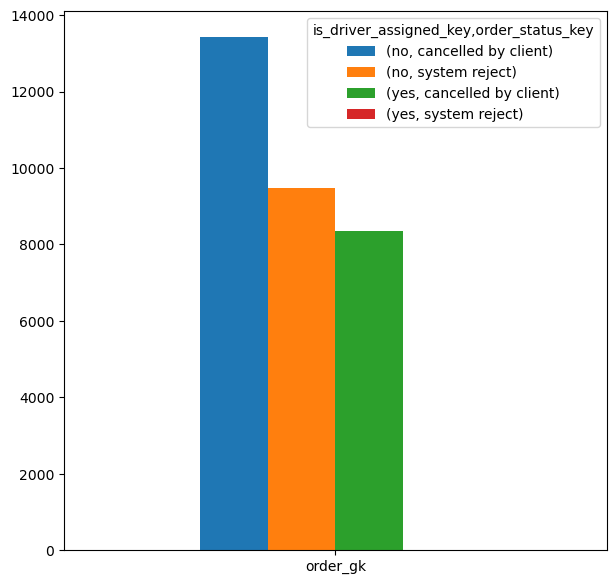

In [17]:
df_q1 = orders.pivot_table(columns=["is_driver_assigned_key", "order_status_key"], values="order_gk", aggfunc="count")
_ = df_q1.plot(kind="bar", subplots=False, figsize=(7, 7), legend=True, rot=0)

Category "cancelled by client and driver hasnt been assigned" has highest number of orders.

# 2. 
Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?


In [18]:
orders['hour'] = orders.order_datetime.dt.hour

In [19]:
resampled = orders.groupby('hour', as_index = False) \
                     .agg({'order_gk':'nunique'}) \
                     .sort_values(by = 'order_gk', ascending = False)

In [20]:
resampled.head(5)

,hour,order_gk
8,8,837
21,21,668
23,23,542
22,22,448
0,0,440


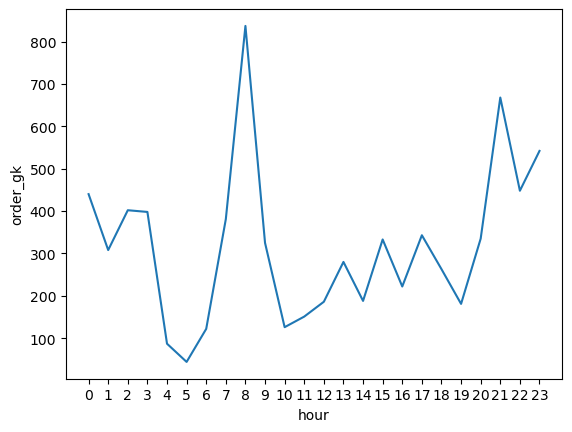

In [21]:
ax = sns.lineplot(data = resampled, x = 'hour', y = 'order_gk')
ax.set(xticks=resampled.hour)

plt.show()

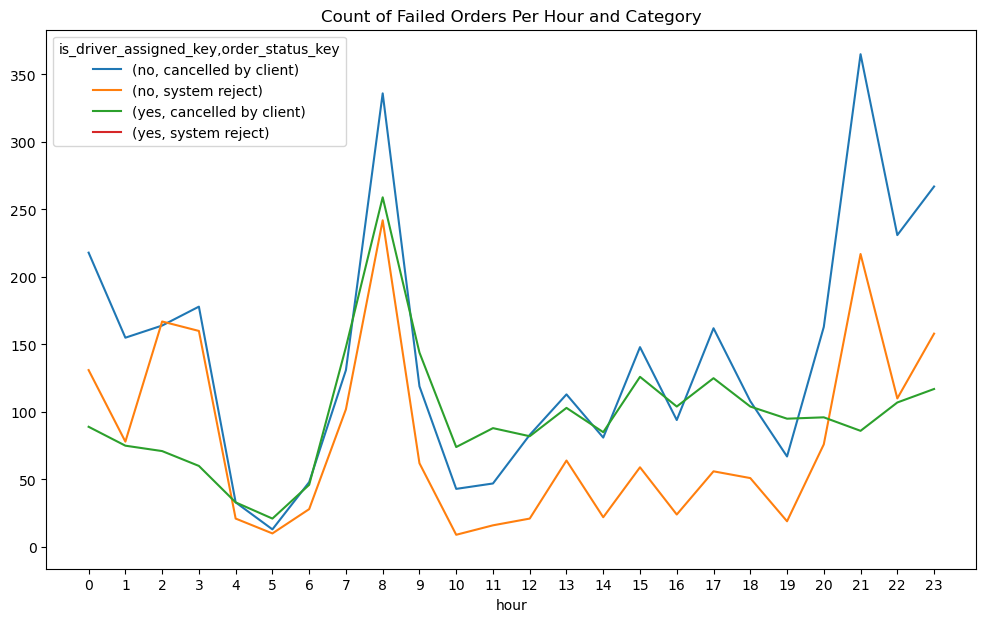

In [22]:
resampled2 = orders.groupby(by=["hour", "is_driver_assigned_key", "order_status_key"], as_index = False) \
                   .agg({'order_gk':'nunique'})

resampled2 = resampled2.pivot(index   = 'hour',
                              columns = ['is_driver_assigned_key','order_status_key'],
                              values  = 'order_gk') \
                       .plot(xticks=range(0, 24),
                             figsize=(12, 7),
                             title="Count of Failed Orders Per Hour and Category")



Probable reasons of cancellations are:

1) at 8 am  people want to get to their jobs

2) at the evening people are coming back home from work, cafetarias, restaraunts, cinemas and other leisure places.

# 3.
Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?

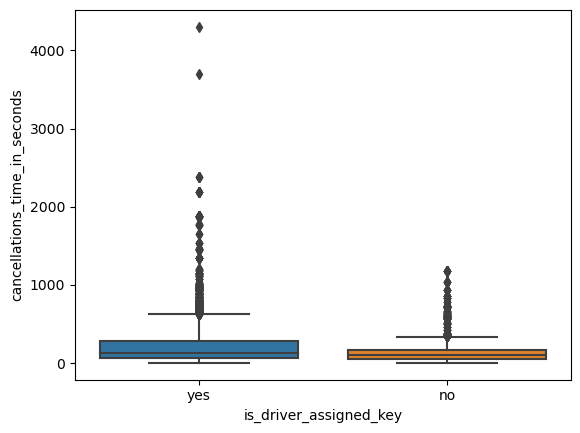

In [23]:
sns.boxplot(data = orders, x = 'is_driver_assigned_key', y = 'cancellations_time_in_seconds');

So there are many outliers. Lets take 99% quantile to remove obvious outliers.

In [24]:
quantiles = orders.groupby('is_driver_assigned_key', as_index = False)['cancellations_time_in_seconds'].quantile(0.99)


quantiles

,is_driver_assigned_key,cancellations_time_in_seconds
0,no,592.00
1,yes,1342.23


In [25]:
d0 = quantiles.cancellations_time_in_seconds[0]
d1 = quantiles.cancellations_time_in_seconds[1]

In [26]:
orders.shape

(31268, 10)

In [27]:
data = orders.query('(is_driver_assigned_key == "no" and cancellations_time_in_seconds < @d0) or (is_driver_assigned_key == "yes" and cancellations_time_in_seconds < @d1)')

In [28]:
data.shape

(21568, 10)

In [29]:
31268 - 21568

9700

Woah! 9700 rows was deleted.

New boxplot looks a lot better.

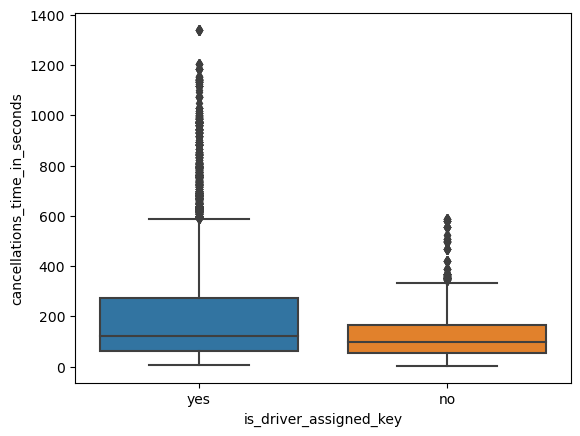

In [30]:
sns.boxplot(data = data, x = 'is_driver_assigned_key', y = 'cancellations_time_in_seconds');

In [31]:
avg_time = data.groupby(['is_driver_assigned_key', 'hour'], as_index = False) \
      .agg(avg_time = ('cancellations_time_in_seconds', 'mean'))

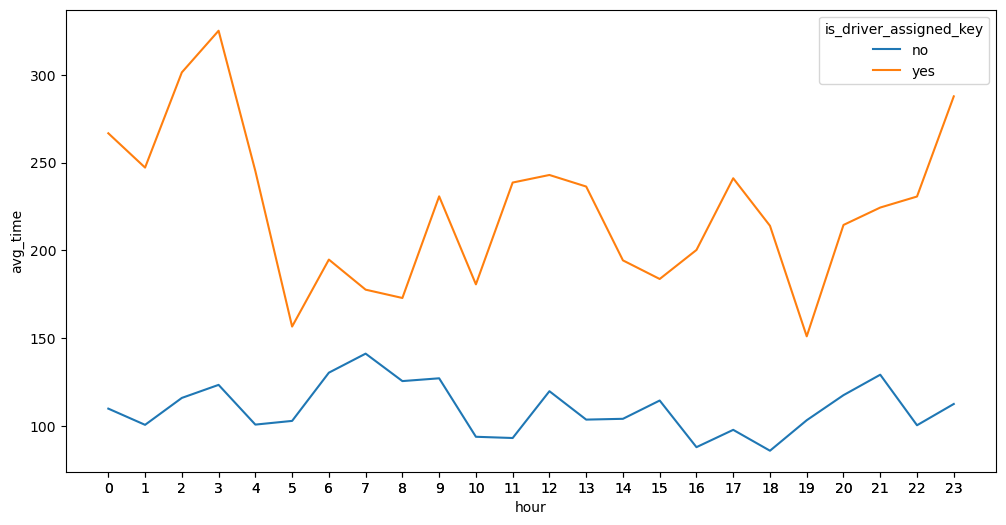

In [32]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data = avg_time, hue = 'is_driver_assigned_key', x = 'hour', y = 'avg_time')
ax.set(xticks=avg_time.hour)
plt.show()

### Coclusions:
It's make no sence to cancellation by hour if driver wasnt assigned.
But if driver was assigned cancellation time is changing noticeably by hour to hour. And there is noticeable trend: from 8pm to 5am cancellation time is higher than usual (night time). Probable reason: Less drivers are on the duty (night shift), and that cause long customers await (Longer distance to get to client).

# 4.
Plot the distribution of average ETA by hours. How can this plot be explained?

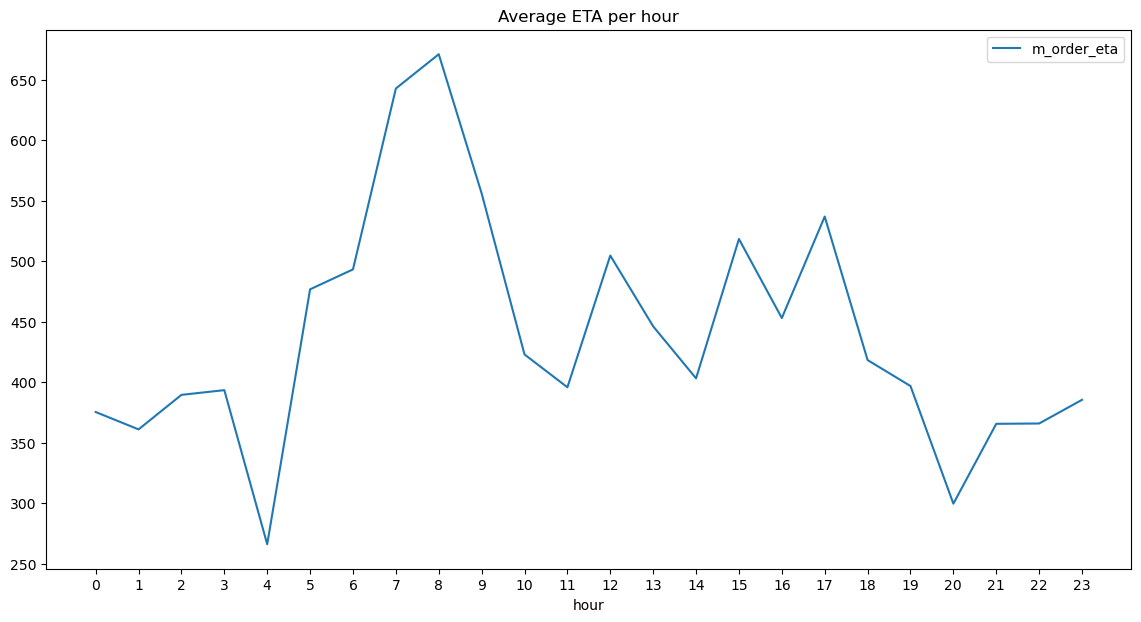

In [34]:
_ = data.groupby("hour", as_index = True) \
        .agg({'m_order_eta':'mean'}) \
        .plot(figsize=(14, 7),
              xticks=range(0, 24),
              title="Average ETA per hour")

### Conclusion:
The line very closely matches the count of failed orders per hour, indicating that the number of failed orders increases as the average waiting time of the client increases.